In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import json
import numpy as np

# Path to the directory containing ZoKrates programs
# program_directory = "./program"
result_directory = './bst'
fig_directory = './fig2_large_font'
file_name = 'zokrates_test_results.json'
no_xtra_features_suffix = '_no_xtra_features'
use_xtra_features = False
# plt.rcParams['font.size'] = 12

In [24]:
def load_results():
    dfs = pd.DataFrame()
    for i in range(5):
        if i<3:
            file_path = os.path.join(result_directory+f'{i+1}', file_name)
        elif use_xtra_features:
            file_path = os.path.join(result_directory+f'{i+1}', file_name)
        else:
            file_path = os.path.join(result_directory+f'{i+1}'+no_xtra_features_suffix, file_name)
        df = pd.read_json(file_path)
        dfs = pd.concat([dfs, df])
    # read bst4_200
    file_path = os.path.join(result_directory+f'{4}'+no_xtra_features_suffix, 'code_200', file_name)
    df = pd.read_json(file_path)
    dfs = pd.concat([dfs, df])
    return dfs

In [25]:
# Parse the program name to model and number of trees
def program_parse(name):
    name_split = name.split('_')
    model = int(name_split[0][3])
    num_trees = int(name_split[1].split('.')[0])
    return model, num_trees

In [26]:
def insert_model_num_trees(df):
    model_list = []
    num_trees_list = []
    for name in df['program']:
        model, num_trees = program_parse(name)
        model_list.append(model)
        num_trees_list.append(num_trees)
    df.insert(2, 'model', model_list, True)
    df.insert(3, 'num_trees', num_trees_list, True)
    return df

In [27]:
dfs = load_results()

In [28]:
dfs = insert_model_num_trees(dfs)

In [29]:
dfs = dfs.sort_values(by=['model', 'num_trees'])

In [30]:
def save_processed_results(dfs):
    dfs.to_csv('zok_results.csv')
    latex_table = dfs.iloc[:, 1:].to_latex(index=False)
    with open('latex_table.txt', 'w') as file:
        file.write(latex_table)

In [31]:
save_processed_results(dfs)

In [40]:
# Plot compile_time, execution_time, verification_time, circuit_size, and proof_size over number of trees
def plot_time_size(dfs):
    metrics = ['compile_time', 'execution_time', 'verification_time', 'circuit_size', 'proof_size']
    titles = ['Compilation Time', 'Execution Time', 'Verification Time', 'Circuit Size', 'Proof Size']
    y_labels = ['(minutes)', '(seconds)', '(seconds)', '(megabytes)', '(bytes)']
    lines = ['-P', '-s', '-o', '-d', '-v']
    
    colormap = plt.get_cmap('Accent')
    colors   = colormap(np.linspace(0, 1, len(lines)))
    
    df = dfs[dfs['num_trees']<=200]
    df.loc[:, 'compile_time'] = df.loc[:, 'compile_time']/60
    df.loc[:, 'circuit_size'] = df.loc[:, 'circuit_size']/1000000
    
    plt.style.use('classic')
    for idx, metric in enumerate(metrics):
        plt.figure()
        for model in range(5):
            dft = df[df['model']==model+1]
            plt.plot(dft['num_trees'], dft[metric], lines[model], color = colors[model], linewidth=2.5, markersize=10, label=f"model {model+1}")
        # plt.title(titles[idx])
        # plt.legend(loc='upper left', fontsize=22)
        plt.legend(fontsize=22)
        plt.xlabel('# of trees', fontsize=22)
        plt.xlim(0, 210)
        if(metric == 'compile_time'):
            # plt.ylim(0, 135)
            plt.yscale('log')
        plt.ylabel(titles[idx].lower()+' '+y_labels[idx], fontsize=22)
        # plt.tick_params('x', labelrotation=45)
        plt.grid(True)
        file_path = os.path.join(fig_directory, metric+'.pdf')
        plt.savefig(file_path, format="pdf")
        plt.show()

/tmp/ipykernel_99/1304274348.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[  11.422834   18.360006   37.89074    79.013061  120.430197  165.813257
   16.976999   29.576933   68.489213  134.895136  205.163373  270.581017
   43.42799    80.547702  194.198552  399.924348  608.131848  828.631363
   77.732861  144.230866  340.950281  675.247453 1026.943605 1413.500002
   21.742204   38.37098    84.885372  164.074129  240.878037  324.240283]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'circuit_size'] = df.loc[:, 'circuit_size']/1000000


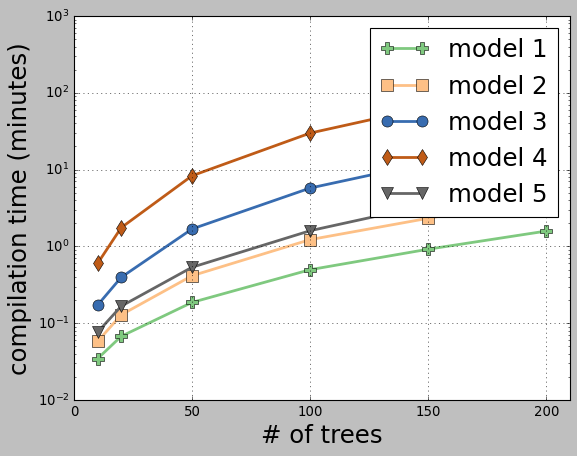

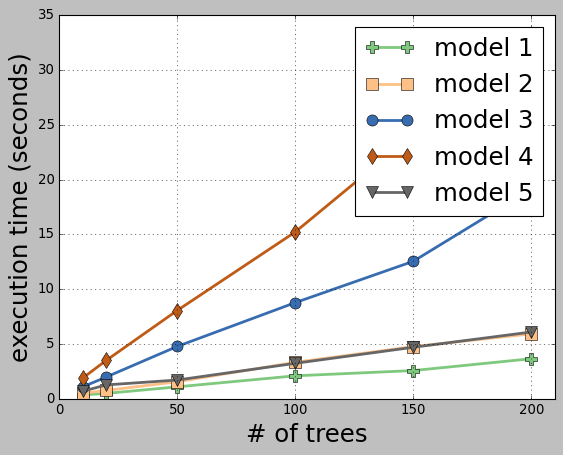

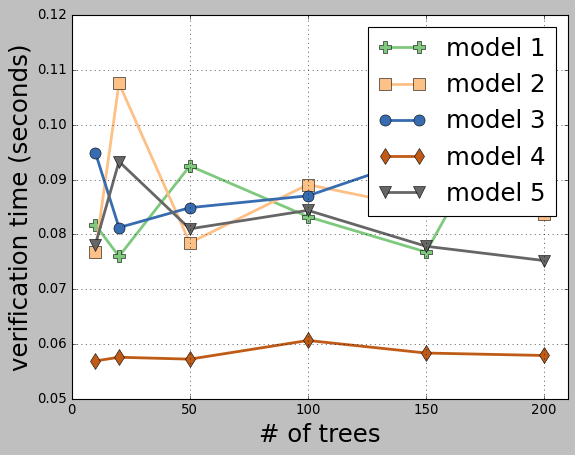

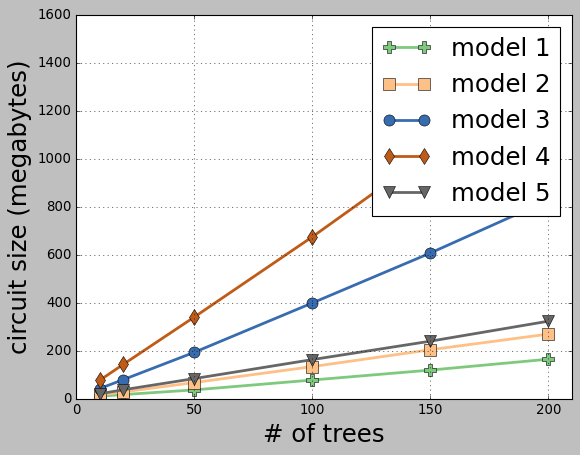

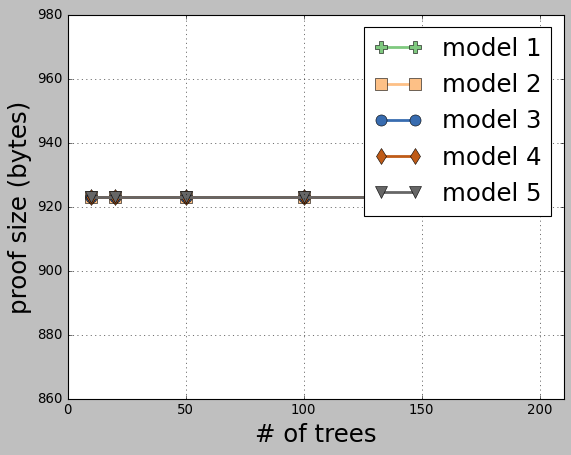

In [41]:
plot_time_size(dfs)

In [42]:
# sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

In [43]:
# # Import seaborn
# import seaborn as sns

# # Apply the default theme
# sns.set_theme()

# # Load an example dataset
# tips = sns.load_dataset("tips")

# # Create a visualization
# sns.relplot(
#     data=tips,
#     x="total_bill", y="tip", col="time",
#     hue="smoker", style="smoker", size="size",
# )

In [44]:
df_sc = pd.read_csv('prune_no_xtra_features.csv')

In [45]:
df_sc

,# of Trees,Private Score,Public Score,#Model 1 Constraints,#Model 2 Constraints,#Model 3 Constraints,#Model 4 Constraints,#Model 5 Constraints,#Aggregated model Constraints
0,10,0.02302,0.02300,27004,40198,97795,168837,50142,383976
1,20,0.01946,0.01945,41562,66888,176398,307596,85388,677832
2,50,0.01266,0.01266,82591,148657,416763,719098,182373,1549482
3,100,0.00868,0.00870,170044,288722,852401,1418270,347279,3076716
4,150,0.00779,0.00781,258665,437535,1292757,2156051,506869,4651877
5,200,0.00758,0.00760,356094,575117,1760336,2968107,681827,6341481


In [46]:
def plot_scores_and_constraints():
    fig = plt.figure()
    fig.clear()
    ax = fig.add_subplot()
    lns1 = ax.plot(df_sc['# of Trees'], df_sc['Public Score'], "-sk", linewidth=2.5, alpha=0.6, markersize=10, label=f"public score")
    lns2 = ax.plot(df_sc['# of Trees'], df_sc['Private Score'], "--^r", linewidth=2.5, markersize=10, label=f"private score")
    ax.set_ylabel('Continuous Ranked Probability Score', fontsize=18)
    
    ax2 = ax.twinx()
    lns3 = ax2.plot(df_sc['# of Trees'], df_sc['#Aggregated model Constraints'], lines[2], color = colors[2], linewidth=2.5, markersize=10, label=f"# of aggregated model constraints")
    ax2.set_ylabel('number of constraints', fontsize=18)
    ax2.ticklabel_format(style='sci',scilimits=(0,0),axis='y')
    lns = lns1+lns2+lns3
    labels = [i.get_label() for i in lns]
    ax.legend(lns, labels, loc=9)
    ax.set_xlabel('number of trees', fontsize=18)
    ax.set_xlim(0, 205)
    # plt.tick_params('x', labelrotation=45)
    ax.grid(True)
    file_path = os.path.join(fig_directory, 'Scores_and_constraints'+'.pdf')
    plt.savefig(file_path, format="pdf")
    plt.show()

In [47]:
# plot_scores_and_constraints()

In [56]:
def plot_number_of_constraints(df_sc):
    lines = ['-P', '-s', '-o', '-d', '-v']
    colormap = plt.get_cmap('Accent')
    colors   = colormap(np.linspace(0, 1, len(lines)))
    plt.figure()
    for model in range(5):
        plt.plot(df_sc['# of Trees'], df_sc[f'#Model {model+1} Constraints'], lines[model], color = colors[model], linewidth=2.5,  markersize=10, label=f"model {model+1}")
    # plt.title(titles[idx])
    plt.legend(loc='upper left', fontsize=22)
    plt.ticklabel_format(style='sci',scilimits=(0,0),axis='y')
    plt.xlabel('# of trees', fontsize=22)
    plt.xlim(0, 210)
    plt.ylim(0, 3100000)
    plt.ylabel('# of constraints', fontsize=22)
    # plt.tick_params('x', labelrotation=45)
    plt.grid(True)
    file_path = os.path.join(fig_directory, 'constraints_of_sub_models'+'.pdf')
    plt.savefig(file_path, format="pdf")
    plt.show()

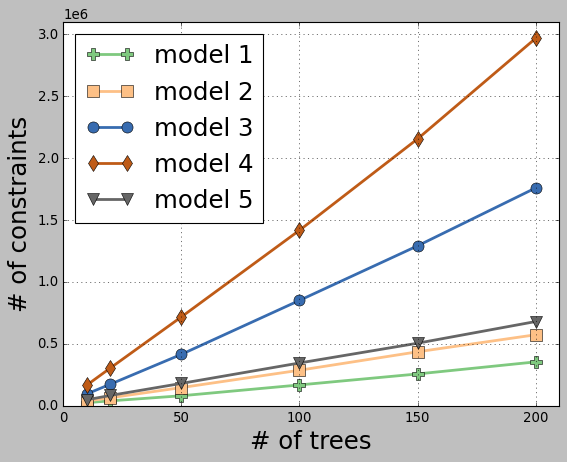

In [57]:
plot_number_of_constraints(df_sc)

In [111]:
# Plot subfigures for compile_time, execution_time, verification_time over number of trees
def plot_sub_time_size(dfs):
    # metrics = ['compile_time', 'execution_time', 'verification_time', 'circuit_size', 'proof_size']
    # titles = ['Compilation Time', 'Execution Time', 'Verification Time', 'Circuit Size', 'Proof Size']
    # y_labels = ['(minutes)', '(seconds)', '(seconds)', '(megabytes)', '(bytes)']
    metrics = ['compile_time', 'execution_time', 'verification_time']
    titles = ['Compilation', 'Proof', 'Verification']
    y_labels = ['(min)', '(s)', '(s)']
    lines = ['-P', '-s', '-o', '-d', '-v']
    
    colormap = plt.get_cmap('Accent')
    colors   = colormap(np.linspace(0, 1, len(lines)))
    
    df = dfs[dfs['num_trees']<=200]
    df.loc[:, 'compile_time'] = df.loc[:, 'compile_time']/60
    df.loc[:, 'circuit_size'] = df.loc[:, 'circuit_size']/1000000
    
    plt.style.use('classic')
    fig = plt.figure()
    # axes = fig.subplots(nrows=2, ncols=3)

    # axess = []
    # for ax in fig.axes:
    #     axess.append(ax)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for idx, metric in enumerate(metrics):
        # plt.figure()
        ax = fig.add_subplot(2, 2, idx+1)
        for model in range(5):
            dft = df[df['model']==model+1]
            ax.plot(dft['num_trees'], dft[metric], lines[model], color = colors[model], linewidth=1, markersize=4, label=f"model {model+1}")
        # plt.title(titles[idx])
        # plt.legend(loc='upper left', fontsize=22)
        # plt.legend(fontsize=22)
        ax.set_xlabel('# of trees', fontsize=18)
        ax.set_xlim(0, 210)
        if(metric == 'compile_time'):
            # plt.ylim(0, 135)
            ax.set_yscale('log')
        ax.set_ylabel(titles[idx].lower()+' '+y_labels[idx], fontsize=18)
        # plt.tick_params('x', labelrotation=45)
        ax.grid(True)
    lines, labels = fig.axes[-1].get_legend_handles_labels()
    fig.legend(lines, labels, bbox_to_anchor=(0.65, 0.15), loc=3, borderaxespad=0)
    file_path = os.path.join(fig_directory, 'sub_time'+'.pdf')
    plt.savefig(file_path, format="pdf")
    plt.show()

/tmp/ipykernel_99/36897605.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[  11.422834   18.360006   37.89074    79.013061  120.430197  165.813257
   16.976999   29.576933   68.489213  134.895136  205.163373  270.581017
   43.42799    80.547702  194.198552  399.924348  608.131848  828.631363
   77.732861  144.230866  340.950281  675.247453 1026.943605 1413.500002
   21.742204   38.37098    84.885372  164.074129  240.878037  324.240283]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'circuit_size'] = df.loc[:, 'circuit_size']/1000000


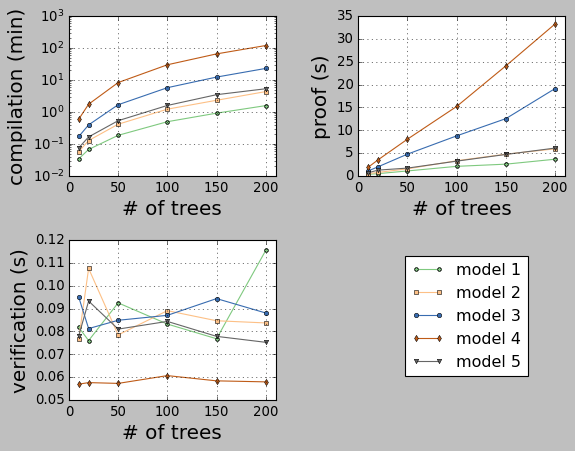

In [112]:
plot_sub_time_size(dfs)

In [128]:
# Plot subfigures for circuit_size, proof_size, # of constraints over number of trees
def plot_sub_space_size(df_sc, dfs):
    metrics = ['circuit_size', 'proof_size']
    titles = ['Circuit', 'Proof']
    y_labels = ['(Mb)', '(B)']
    lines = ['-P', '-s', '-o', '-d', '-v']
    
    colormap = plt.get_cmap('Accent')
    colors   = colormap(np.linspace(0, 1, len(lines)))
    
    df = dfs[dfs['num_trees']<=200]
    df.loc[:, 'compile_time'] = df.loc[:, 'compile_time']/60
    df.loc[:, 'circuit_size'] = df.loc[:, 'circuit_size']/1000000
    
    plt.style.use('classic')
    fig = plt.figure()
    # axes = fig.subplots(nrows=2, ncols=3)

    # axess = []
    # for ax in fig.axes:
    #     axess.append(ax)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    # plot_number_of_constraints
    ax = fig.add_subplot(2, 2, 1)
    for model in range(5):
        plt.plot(df_sc['# of Trees'], df_sc[f'#Model {model+1} Constraints'], lines[model], color = colors[model], linewidth=1,  markersize=4, label=f"model {model+1}")
    # plt.title(titles[idx])
    # plt.legend(loc='upper left', fontsize=22)
    ax.ticklabel_format(style='sci',scilimits=(0,0),axis='y')
    ax.set_xlabel('# of trees', fontsize=18)
    ax.set_xlim(0, 210)
    ax.set_ylim(0, 3100000)
    ax.set_ylabel('# of constraints', fontsize=18)
    # plt.tick_params('x', labelrotation=45)
    ax.grid(True)
    
    for idx, metric in enumerate(metrics):
        # plt.figure()
        ax = fig.add_subplot(2, 2, idx+2)
        for model in range(5):
            dft = df[df['model']==model+1]
            ax.plot(dft['num_trees'], dft[metric], lines[model], color = colors[model], linewidth=1, markersize=4, label=f"model {model+1}")
        # plt.title(titles[idx])
        # plt.legend(loc='upper left', fontsize=22)
        # plt.legend(fontsize=22)
        ax.set_xlabel('# of trees', fontsize=18)
        ax.set_xlim(0, 210)
        if(metric == 'compile_time'):
            # plt.ylim(0, 135)
            ax.set_yscale('log')
        ax.set_ylabel(titles[idx].lower()+' '+y_labels[idx], fontsize=18)
        # plt.tick_params('x', labelrotation=45)
        ax.grid(True)
    lines, labels = fig.axes[-1].get_legend_handles_labels()
    fig.legend(lines, labels, bbox_to_anchor=(0.65, 0.15), loc=3, borderaxespad=0)
    file_path = os.path.join(fig_directory, 'sub_space'+'.pdf')
    plt.savefig(file_path, format="pdf")
    plt.show()

/tmp/ipykernel_99/3651992803.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[  11.422834   18.360006   37.89074    79.013061  120.430197  165.813257
   16.976999   29.576933   68.489213  134.895136  205.163373  270.581017
   43.42799    80.547702  194.198552  399.924348  608.131848  828.631363
   77.732861  144.230866  340.950281  675.247453 1026.943605 1413.500002
   21.742204   38.37098    84.885372  164.074129  240.878037  324.240283]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'circuit_size'] = df.loc[:, 'circuit_size']/1000000


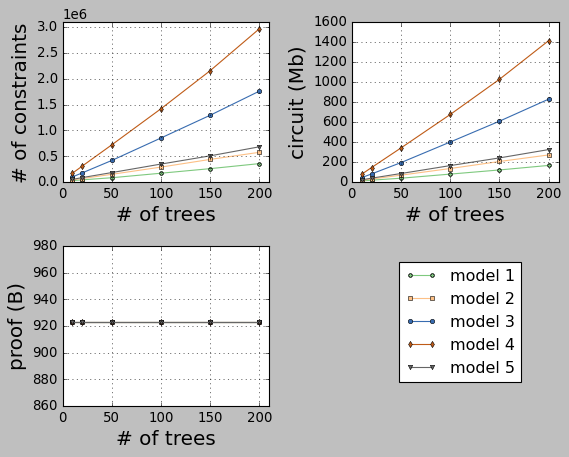

In [129]:
plot_sub_space_size(df_sc, dfs)